<a href="https://colab.research.google.com/github/tsancode/CDD_ML_NAMPT/blob/main/2_NAMPT_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

In **Part 1**, we already collected the data about NAMPT from CHEMBL database.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.


*Tsaniyah Nur Kholilah*

inspired from : *Data Professor*


---

## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-05-14 10:01:35--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   130MB/s    in 0.6s    

2022-05-14 10:01:36 (130 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=p

## **Load bioactivity data**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/NAMPT_bioactivity_preprocessed_data.csv')

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)

Previously, I keep getting an error from one line in lipinski function. 
mol = Chem.MolFromSmiles(elem)

TypeError: No registered converter was able to produce a C++ rvalue of type std::__cxx11::basic_string<wchar_t, std::char_traits<wchar_t>, std::allocator<wchar_t> > from this Python object of type float

I think there is an issue with the smiles data. There is one missing cannonical smiles when I check on csv. I'm already droped this value




### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,391.515,3.93370,1.0,3.0
1,379.504,3.86680,2.0,2.0
2,419.956,5.63780,1.0,3.0
3,405.929,5.08160,1.0,3.0
4,389.886,4.30480,1.0,3.0
...,...,...,...,...
2681,475.702,6.13860,1.0,4.0
2682,523.725,6.42780,3.0,4.0
2683,523.725,6.42780,3.0,4.0
2684,379.420,3.07412,2.0,6.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL566757,O=C(/C=C/c1cccnc1)NCCCCC1CCN(C(=O)c2ccccc2)CC1,inactive,14800.000
1,CHEMBL1762233,O=C(/C=C/c1ccc[nH]1)NCCCCC1CCN(C(=O)c2ccccc2)CC1,inactive,20300.000
2,CHEMBL1801562,CC(C)=CCN(Cc1ccccc1Cl)c1ccc(C(=O)NCc2cccnc2)cc1,active,1.900
3,CHEMBL1801561,O=C(NCc1cccnc1)c1ccc(N(Cc2ccccc2Cl)CC2CC2)cc1,active,1.300
4,CHEMBL1801560,C#CCN(Cc1ccccc1Cl)c1ccc(C(=O)NCc2cccnc2)cc1,active,4.200
...,...,...,...,...
2681,CHEMBL4544855,CC(C)N(CCc1ccsc1)Cc1ccc(CCCCCNC(=O)/C=C/c2cccn...,active,195.000
2682,CHEMBL4544378,CC(C)N(CCc1c[nH]c2ccccc12)Cc1ccc(NCCCCCNC(=O)/...,active,25.300
2683,CHEMBL4544378,CC(C)N(CCc1c[nH]c2ccccc12)Cc1ccc(NCCCCCNC(=O)/...,active,0.155
2684,CHEMBL4635425,CCOC(=O)c1ccc(NC(=O)NCc2ccnc(-n3ccnc3C)c2)cc1,intermediate,7310.000


Now, let's combine the 2 DataFrame

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL566757,O=C(/C=C/c1cccnc1)NCCCCC1CCN(C(=O)c2ccccc2)CC1,inactive,14800.000,391.515,3.93370,1.0,3.0
1,CHEMBL1762233,O=C(/C=C/c1ccc[nH]1)NCCCCC1CCN(C(=O)c2ccccc2)CC1,inactive,20300.000,379.504,3.86680,2.0,2.0
2,CHEMBL1801562,CC(C)=CCN(Cc1ccccc1Cl)c1ccc(C(=O)NCc2cccnc2)cc1,active,1.900,419.956,5.63780,1.0,3.0
3,CHEMBL1801561,O=C(NCc1cccnc1)c1ccc(N(Cc2ccccc2Cl)CC2CC2)cc1,active,1.300,405.929,5.08160,1.0,3.0
4,CHEMBL1801560,C#CCN(Cc1ccccc1Cl)c1ccc(C(=O)NCc2cccnc2)cc1,active,4.200,389.886,4.30480,1.0,3.0
...,...,...,...,...,...,...,...,...
2681,CHEMBL4544855,CC(C)N(CCc1ccsc1)Cc1ccc(CCCCCNC(=O)/C=C/c2cccn...,active,195.000,475.702,6.13860,1.0,4.0
2682,CHEMBL4544378,CC(C)N(CCc1c[nH]c2ccccc12)Cc1ccc(NCCCCCNC(=O)/...,active,25.300,523.725,6.42780,3.0,4.0
2683,CHEMBL4544378,CC(C)N(CCc1c[nH]c2ccccc12)Cc1ccc(NCCCCCNC(=O)/...,active,0.155,523.725,6.42780,3.0,4.0
2684,CHEMBL4635425,CCOC(=O)c1ccc(NC(=O)NCc2ccnc(-n3ccnc3C)c2)cc1,intermediate,7310.000,379.420,3.07412,2.0,6.0


## **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

count       2682.000000
mean        2313.880902
std        28038.988342
min            0.030100
25%            9.920000
50%           32.750000
75%          150.000000
max      1000000.000000
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL566757,O=C(/C=C/c1cccnc1)NCCCCC1CCN(C(=O)c2ccccc2)CC1,inactive,391.515,3.93370,1.0,3.0,14800.000
1,CHEMBL1762233,O=C(/C=C/c1ccc[nH]1)NCCCCC1CCN(C(=O)c2ccccc2)CC1,inactive,379.504,3.86680,2.0,2.0,20300.000
2,CHEMBL1801562,CC(C)=CCN(Cc1ccccc1Cl)c1ccc(C(=O)NCc2cccnc2)cc1,active,419.956,5.63780,1.0,3.0,1.900
3,CHEMBL1801561,O=C(NCc1cccnc1)c1ccc(N(Cc2ccccc2Cl)CC2CC2)cc1,active,405.929,5.08160,1.0,3.0,1.300
4,CHEMBL1801560,C#CCN(Cc1ccccc1Cl)c1ccc(C(=O)NCc2cccnc2)cc1,active,389.886,4.30480,1.0,3.0,4.200
...,...,...,...,...,...,...,...,...
2681,CHEMBL4544855,CC(C)N(CCc1ccsc1)Cc1ccc(CCCCCNC(=O)/C=C/c2cccn...,active,475.702,6.13860,1.0,4.0,195.000
2682,CHEMBL4544378,CC(C)N(CCc1c[nH]c2ccccc12)Cc1ccc(NCCCCCNC(=O)/...,active,523.725,6.42780,3.0,4.0,25.300
2683,CHEMBL4544378,CC(C)N(CCc1c[nH]c2ccccc12)Cc1ccc(NCCCCCNC(=O)/...,active,523.725,6.42780,3.0,4.0,0.155
2684,CHEMBL4635425,CCOC(=O)c1ccc(NC(=O)NCc2ccnc(-n3ccnc3C)c2)cc1,intermediate,379.420,3.07412,2.0,6.0,7310.000


In [ ]:
df_norm.standard_value_norm.describe()

count       2682.000000
mean        2313.880902
std        28038.988342
min            0.030100
25%            9.920000
50%           32.750000
75%          150.000000
max      1000000.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL566757,O=C(/C=C/c1cccnc1)NCCCCC1CCN(C(=O)c2ccccc2)CC1,inactive,391.515,3.93370,1.0,3.0,4.829738
1,CHEMBL1762233,O=C(/C=C/c1ccc[nH]1)NCCCCC1CCN(C(=O)c2ccccc2)CC1,inactive,379.504,3.86680,2.0,2.0,4.692504
2,CHEMBL1801562,CC(C)=CCN(Cc1ccccc1Cl)c1ccc(C(=O)NCc2cccnc2)cc1,active,419.956,5.63780,1.0,3.0,8.721246
3,CHEMBL1801561,O=C(NCc1cccnc1)c1ccc(N(Cc2ccccc2Cl)CC2CC2)cc1,active,405.929,5.08160,1.0,3.0,8.886057
4,CHEMBL1801560,C#CCN(Cc1ccccc1Cl)c1ccc(C(=O)NCc2cccnc2)cc1,active,389.886,4.30480,1.0,3.0,8.376751
...,...,...,...,...,...,...,...,...
2681,CHEMBL4544855,CC(C)N(CCc1ccsc1)Cc1ccc(CCCCCNC(=O)/C=C/c2cccn...,active,475.702,6.13860,1.0,4.0,6.709965
2682,CHEMBL4544378,CC(C)N(CCc1c[nH]c2ccccc12)Cc1ccc(NCCCCCNC(=O)/...,active,523.725,6.42780,3.0,4.0,7.596879
2683,CHEMBL4544378,CC(C)N(CCc1c[nH]c2ccccc12)Cc1ccc(NCCCCCNC(=O)/...,active,523.725,6.42780,3.0,4.0,9.809668
2684,CHEMBL4635425,CCOC(=O)c1ccc(NC(=O)NCc2ccnc(-n3ccnc3C)c2)cc1,intermediate,379.420,3.07412,2.0,6.0,5.136083


In [ ]:
df_final.pIC50.describe()

count    2682.000000
mean        7.336813
std         0.963174
min         3.000000
25%         6.823909
50%         7.484789
75%         8.003489
max        10.521434
Name: pIC50, dtype: float64

### Handling missing data

In [ ]:
df_final2 = df_final[df_final.pIC50.notna()]
df_final2

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL566757,O=C(/C=C/c1cccnc1)NCCCCC1CCN(C(=O)c2ccccc2)CC1,inactive,391.515,3.93370,1.0,3.0,4.829738
1,CHEMBL1762233,O=C(/C=C/c1ccc[nH]1)NCCCCC1CCN(C(=O)c2ccccc2)CC1,inactive,379.504,3.86680,2.0,2.0,4.692504
2,CHEMBL1801562,CC(C)=CCN(Cc1ccccc1Cl)c1ccc(C(=O)NCc2cccnc2)cc1,active,419.956,5.63780,1.0,3.0,8.721246
3,CHEMBL1801561,O=C(NCc1cccnc1)c1ccc(N(Cc2ccccc2Cl)CC2CC2)cc1,active,405.929,5.08160,1.0,3.0,8.886057
4,CHEMBL1801560,C#CCN(Cc1ccccc1Cl)c1ccc(C(=O)NCc2cccnc2)cc1,active,389.886,4.30480,1.0,3.0,8.376751
...,...,...,...,...,...,...,...,...
2681,CHEMBL4544855,CC(C)N(CCc1ccsc1)Cc1ccc(CCCCCNC(=O)/C=C/c2cccn...,active,475.702,6.13860,1.0,4.0,6.709965
2682,CHEMBL4544378,CC(C)N(CCc1c[nH]c2ccccc12)Cc1ccc(NCCCCCNC(=O)/...,active,523.725,6.42780,3.0,4.0,7.596879
2683,CHEMBL4544378,CC(C)N(CCc1c[nH]c2ccccc12)Cc1ccc(NCCCCCNC(=O)/...,active,523.725,6.42780,3.0,4.0,9.809668
2684,CHEMBL4635425,CCOC(=O)c1ccc(NC(=O)NCc2ccnc(-n3ccnc3C)c2)cc1,intermediate,379.420,3.07412,2.0,6.0,5.136083


### Save dataframe to csv

In [ ]:
df_final2.to_csv('NAMPT_bioactivity_clean_data2.csv', index=False)

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL566757,O=C(/C=C/c1cccnc1)NCCCCC1CCN(C(=O)c2ccccc2)CC1,inactive,391.515,3.9337,1.0,3.0,4.829738
1,CHEMBL1762233,O=C(/C=C/c1ccc[nH]1)NCCCCC1CCN(C(=O)c2ccccc2)CC1,inactive,379.504,3.8668,2.0,2.0,4.692504
2,CHEMBL1801562,CC(C)=CCN(Cc1ccccc1Cl)c1ccc(C(=O)NCc2cccnc2)cc1,active,419.956,5.6378,1.0,3.0,8.721246
3,CHEMBL1801561,O=C(NCc1cccnc1)c1ccc(N(Cc2ccccc2Cl)CC2CC2)cc1,active,405.929,5.0816,1.0,3.0,8.886057
4,CHEMBL1801560,C#CCN(Cc1ccccc1Cl)c1ccc(C(=O)NCc2cccnc2)cc1,active,389.886,4.3048,1.0,3.0,8.376751
...,...,...,...,...,...,...,...,...
2679,CHEMBL4439790,CC(C)N(CCc1ccc(C(F)(F)F)cc1)Cc1ccc(CCCCCNC(=O)...,active,537.670,7.0959,1.0,3.0,6.441291
2680,CHEMBL4467850,COc1ccc(CCN(Cc2ccc(CCCCCNC(=O)/C=C/c3cccnc3)cc...,active,499.699,6.0857,1.0,4.0,7.261219
2681,CHEMBL4544855,CC(C)N(CCc1ccsc1)Cc1ccc(CCCCCNC(=O)/C=C/c2cccn...,active,475.702,6.1386,1.0,4.0,6.709965
2682,CHEMBL4544378,CC(C)N(CCc1c[nH]c2ccccc12)Cc1ccc(NCCCCCNC(=O)/...,active,523.725,6.4278,3.0,4.0,7.596879


---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

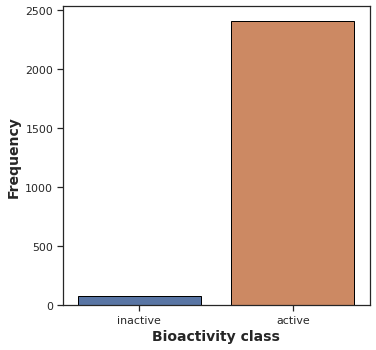

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

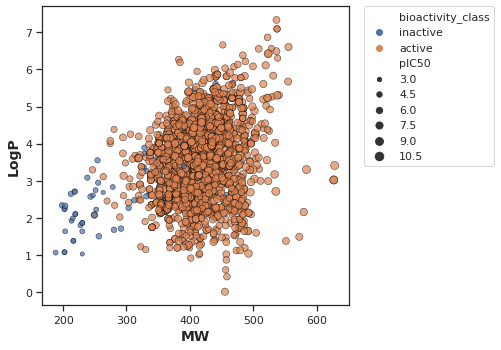

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

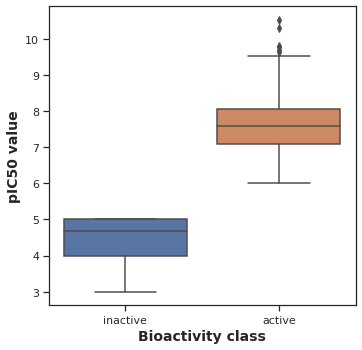

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,1.157521e-49,0.05,Different distribution (reject H0)


#### **MW**

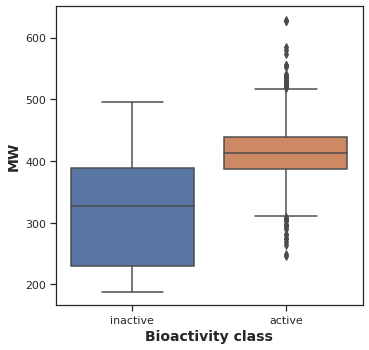

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,29766.0,1.868295e-23,0.05,Different distribution (reject H0)


#### **LogP**

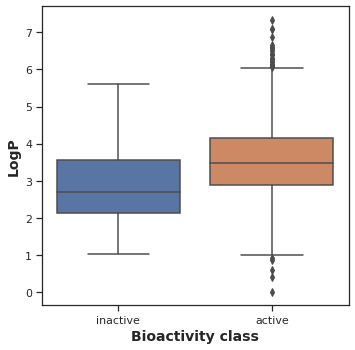

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,55835.0,7.754097e-09,0.05,Different distribution (reject H0)


#### **NumHDonors**

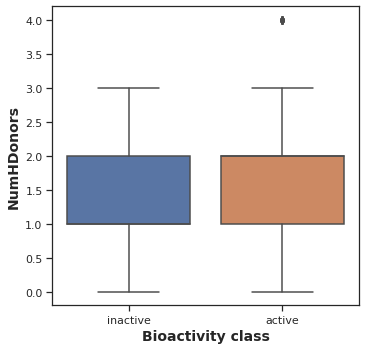

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,83253.5,0.095048,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

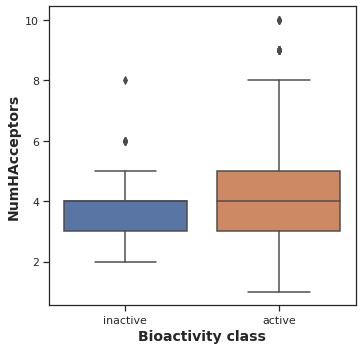

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,74358.5,0.003342,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: plot_MW_vs_LogP.pdf (deflated 2%)
  adding: mannwhitneyu_MW.csv (deflated 7%)
  adding: NAMPT_bioactivity_preprocessed_data.csv (deflated 85%)
  adding: bioactivity_clean_data.csv (deflated 82%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 12%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 12%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_MW.pdf (deflated 37%)
  adding: plot_LogP.pdf (deflated 37%)


## Sort and select only pIC50 > **6**

In [ ]:
df_sort = df_final.sort_values(by="pIC50")
df_sort.tail()

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
500,CHEMBL566757,O=C(/C=C/c1cccnc1)NCCCCC1CCN(C(=O)c2ccccc2)CC1,active,391.515,3.9337,1.0,3.0,10.521434
405,CHEMBL3127517,O=C(Nc1ccc([N+](=O)[O-])cc1)C1CC1,intermediate,206.201,1.9433,1.0,3.0,NaN
406,CHEMBL3127516,CC(=O)Nc1ccc(NC(=O)C2CC2)cc1,intermediate,218.256,1.9935,2.0,2.0,NaN
2600,CHEMBL98,O=C(CCCCCCC(=O)Nc1ccccc1)NO,intermediate,264.325,2.4711,3.0,3.0,NaN
2617,CHEMBL98,O=C(CCCCCCC(=O)Nc1ccccc1)NO,intermediate,264.325,2.4711,3.0,3.0,NaN


In [ ]:
df_sort[260:269]

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1878,CHEMBL3955806,CC(C)(C)OC(=O)NCC1CN(c2ccc(NC(=O)N3Cc4ccccc4C3...,intermediate,422.529,4.1952,2.0,4.0,5.931814
1477,CHEMBL3966992,CC(C)CCn1cc(NC(=O)N2Cc3ccc(CO)cc3C2)cn1,intermediate,328.416,2.9692,2.0,4.0,5.946922
2071,CHEMBL3952272,C[C@H](NC(=O)c1ccc(NC(=O)N2Cc3cccnc3C2)cc1)C1CC1,intermediate,350.422,3.1576,2.0,3.0,5.946922
1914,CHEMBL3949058,O=C(Nc1ccc(C(=O)N2CCCC3(CCNC3)C2)cc1)N1Cc2ccnc...,intermediate,405.502,2.8450,2.0,4.0,5.950782
489,CHEMBL3752639,O=C(NCCCn1ccnc1)c1cc2ccccc2s1,intermediate,285.372,2.9179,1.0,4.0,5.958607
1206,CHEMBL3927403,CCCNC(=O)c1ccc(NC(=O)N2Cc3ccc(C(O)CO)cc3C2)cc1,intermediate,383.448,2.3998,4.0,4.0,5.987163
1033,CHEMBL3982601,CCCNC(=O)c1ccc(NC(=O)N2Cc3ccc(N)cc3C2)cc1,intermediate,338.411,2.9563,3.0,3.0,5.987163
1036,CHEMBL3907234,CCCNC(=O)c1ccc(NC(=O)N2Cc3ccc(NC(=O)C(C)(C)O)c...,intermediate,424.501,3.0835,4.0,4.0,5.991400
1165,CHEMBL3938346,O=C(Nc1ccc(-c2noc(Cc3ccccc3)n2)cc1)N1Cc2ccccc2C1,intermediate,396.450,4.8751,1.0,4.0,5.991400


In [ ]:
df_pIC50_6_or_more = df_sort[269:2685]
df_pIC50_6_or_more

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
222,CHEMBL2420673,O=C(NCc1ccc(S(=O)(=O)N2CCCCC2)cc1)c1cc2ccncc2[...,active,398.488,2.6675,2.0,4.0,6.000000
346,CHEMBL1412250,O=C(Nc1cccnc1)c1ccc(-c2ccccc2)cc1,active,274.323,4.0009,1.0,2.0,6.000000
366,CHEMBL3116399,O=C(Nc1cccnc1)c1ccc2c(c1)ncn2CC1CCN(C(=O)c2ccc...,active,439.519,4.2360,1.0,5.0,6.000000
2667,CHEMBL4455440,O=C(/C=C/c1cccnc1)NCCCc1ccc(CN(CCc2c[nH]c3cccc...,active,528.700,6.5700,2.0,3.0,6.000000
1032,CHEMBL3906515,CCCNC(=O)c1ccc(NC(=O)N2Cc3ccc(C(=O)O)cc3C2)cc1,active,367.405,3.0723,3.0,3.0,6.000000
...,...,...,...,...,...,...,...,...
499,CHEMBL3753643,O=C(/C=C/c1cccnc1)NCCCCCc1cn(-c2ccccc2-c2ccccc...,active,437.547,4.8717,1.0,5.0,10.293282
500,CHEMBL566757,O=C(/C=C/c1cccnc1)NCCCCC1CCN(C(=O)c2ccccc2)CC1,active,391.515,3.9337,1.0,3.0,10.521434
405,CHEMBL3127517,O=C(Nc1ccc([N+](=O)[O-])cc1)C1CC1,intermediate,206.201,1.9433,1.0,3.0,NaN
406,CHEMBL3127516,CC(=O)Nc1ccc(NC(=O)C2CC2)cc1,intermediate,218.256,1.9935,2.0,2.0,NaN


### Handling missing pIC50 values

In [ ]:
df2 = df_pIC50_6_or_more[df_pIC50_6_or_more.pIC50.notna()]
df2

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
222,CHEMBL2420673,O=C(NCc1ccc(S(=O)(=O)N2CCCCC2)cc1)c1cc2ccncc2[...,active,398.488,2.66750,2.0,4.0,6.000000
346,CHEMBL1412250,O=C(Nc1cccnc1)c1ccc(-c2ccccc2)cc1,active,274.323,4.00090,1.0,2.0,6.000000
366,CHEMBL3116399,O=C(Nc1cccnc1)c1ccc2c(c1)ncn2CC1CCN(C(=O)c2ccc...,active,439.519,4.23600,1.0,5.0,6.000000
2667,CHEMBL4455440,O=C(/C=C/c1cccnc1)NCCCc1ccc(CN(CCc2c[nH]c3cccc...,active,528.700,6.57000,2.0,3.0,6.000000
1032,CHEMBL3906515,CCCNC(=O)c1ccc(NC(=O)N2Cc3ccc(C(=O)O)cc3C2)cc1,active,367.405,3.07230,3.0,3.0,6.000000
...,...,...,...,...,...,...,...,...
287,CHEMBL3094250,N#C/N=C(\NCCCCCCC(=O)N(OCCN1CCOCC1)C1CCCCC1)Nc...,active,499.660,3.29578,2.0,7.0,9.698970
413,CHEMBL3260316,CC(C)CCN(C(=O)COc1ccccc1)c1ncc(C(=O)NCCCn2ccnc...,active,455.584,3.61780,1.0,7.0,9.759451
2683,CHEMBL4544378,CC(C)N(CCc1c[nH]c2ccccc12)Cc1ccc(NCCCCCNC(=O)/...,active,523.725,6.42780,3.0,4.0,9.809668
499,CHEMBL3753643,O=C(/C=C/c1cccnc1)NCCCCCc1cn(-c2ccccc2-c2ccccc...,active,437.547,4.87170,1.0,5.0,10.293282


### Save dataframe to csv

In [ ]:
df2.to_csv("NAMPT_clean_data.csv", index=False)

Download to local